# Навчання без учителя (Unsupervised Learning)

## Кластеризація методом к–середніх (k-means clustering)

Метод k–середніх — це один із найпопулярніших алгоритмів некерованого навчання (unsupervised learning), який використовується для розбиття даних на $k$ кластерів так, щоб об’єкти всередині одного кластера були схожими між собою, а між різними кластерами — максимально відрізнялися.

Нехай маємо вибірку з $ n $ об’єктів:

$$
X = {x_1, x_2, \ldots, x_n}, \quad x_i \in \mathbb{R}^d
$$

де $ d $ — кількість ознак (вимірів).

Ми хочемо розбити множину $ X $ на $ k $ кластерів:

$$
C_1, C_2, \ldots, C_k
$$

так, щоб мінімізувати суму квадратів відстаней точок до центрів своїх кластерів.

Алгоритм мінімізує наступну функцію вартості (відомо як *within-cluster sum of squares*, WCSS):

$$
J = \sum_{j=1}^{k} \sum_{x_i \in C_j} |x_i - \mu_j|^2
$$

де:

- $ \mu_j $ — центр (середнє) кластера $ C_j $:
  $$
  \mu_j = \frac{1}{|C_j|} \sum_{x_i \in C_j} x_i
  $$
- $ |x_i - \mu_j|^2 $ — квадрат евклідової відстані між точкою та центром кластера.

Алгоритм ітеративний і складається з таких кроків:

1. Ініціалізація:   Вибрати випадковим чином $ k $ початкових центрів кластерів $ \mu_1, \mu_2, \ldots, \mu_k $.

2. Крок призначення (Assignment step):
   Для кожної точки ( x_i ) визначити найближчий центр:
   $$
   c_i = \arg \min_{j \in {1,\ldots,k}} |x_i - \mu_j|^2
   $$
   Тобто точка належить до того кластера, чий центр ближчий.

3. Крок оновлення центрів (Update step)
   Для кожного кластера $ C_j $ оновити центр як середнє всіх точок цього кластера:
   $$
   \mu_j = \frac{1}{|C_j|} \sum_{x_i \in C_j} x_i
   $$

4. Перевірка зупинки:   Алгоритм зупиняється, коли центри кластерів перестають змінюватися або зміни стають незначними.


![graph](../resources/ml-uns-1.gif)

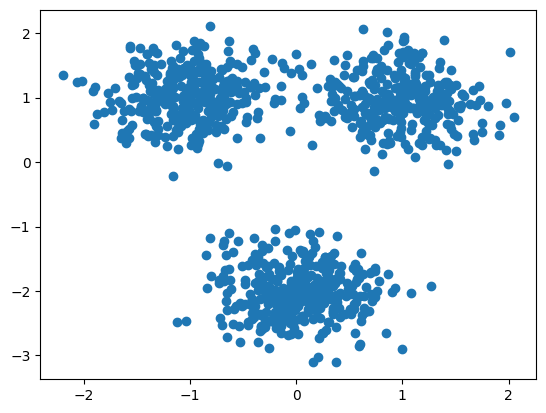

In [1]:
import numpy as np
import matplotlib.pyplot as plt

X = m,n = (1000,2)
np.random.seed(0)
X = 0.4*np.random.randn(m,n)
Mu0 = np.array([[0,-2], [-1,1], [1,1]])
X += Mu0[np.random.choice(np.arange(3), m),:]
plt.scatter(X[:,0], X[:,1])

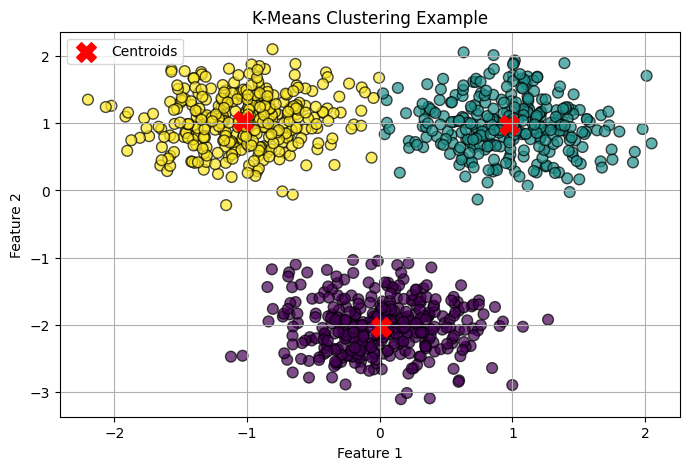

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# apply k-means
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X)
centers = kmeans.cluster_centers_

# visualization
plt.figure(figsize=(8, 5))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=60, edgecolors='k', alpha=0.7)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='X', label='Centroids')
plt.title('K-Means Clustering Example')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

## Метод головних компонент (PCA)

Метод головних компонент (PCA) — це статистичний метод зменшення розмірності даних.
Його ідея полягає в тому, щоб знайти нову систему координат, де:

- перша вісь (перша головна компонента) пояснює максимальну дисперсію даних,

- друга — наступну за величиною дисперсію, і т. д.
Так при збереженні головних компонент ми зберігаємо максимум інформації при мінімумі вимірів.


![nonlinear](../resources/ml-uns-2.png)

In [6]:
import pandas as pd 
import numpy as np # Here we are using inbuilt dataset of scikit learn 
from sklearn.datasets import load_breast_cancer # instantiating 
cancer = load_breast_cancer(as_frame=True) 
# creating dataframe 
df = cancer.frame # checking shape 
print('Original Dataframe shape :',df.shape) # Input features 
X = df[cancer['feature_names']] 
print('Inputs Dataframe shape :', X.shape)

Original Dataframe shape : (569, 31)
Inputs Dataframe shape : (569, 30)


In [7]:
X_mean = X.mean()
X_std = X.std()
X_normalized = (X - X_mean) / X_std

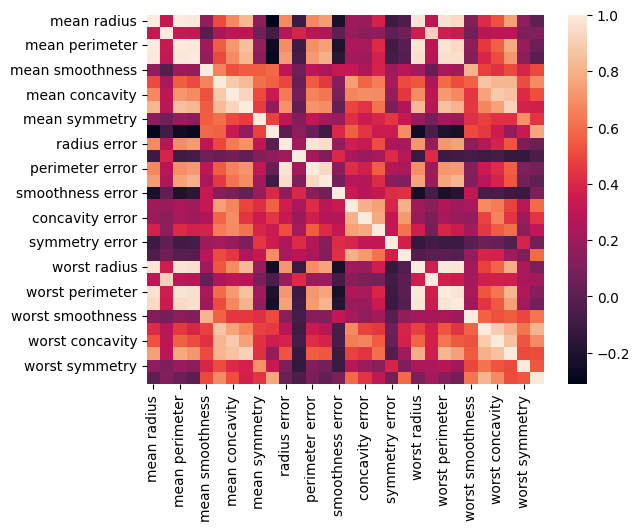

In [8]:
# covariance 
c = X_normalized.cov() # Plot the covariance matrix 
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.heatmap(c) 
plt.show()

In [9]:
eigenvalues, eigenvectors = np.linalg.eig(c) 
print('Eigen values:\n', eigenvalues) 
print('Eigen values Shape:', eigenvalues.shape) 
print('Eigen Vector Shape:', eigenvectors.shape)

Eigen values:
 [1.32816077e+01 5.69135461e+00 2.81794898e+00 1.98064047e+00
 1.64873055e+00 1.20735661e+00 6.75220114e-01 4.76617140e-01
 4.16894812e-01 3.50693457e-01 2.93915696e-01 2.61161370e-01
 2.41357496e-01 1.57009724e-01 9.41349650e-02 7.98628010e-02
 5.93990378e-02 5.26187835e-02 4.94775918e-02 1.33044823e-04
 7.48803097e-04 1.58933787e-03 6.90046388e-03 8.17763986e-03
 1.54812714e-02 1.80550070e-02 2.43408378e-02 2.74394025e-02
 3.11594025e-02 2.99728939e-02]
Eigen values Shape: (30,)
Eigen Vector Shape: (30, 30)


In [10]:
# Index the eigenvalues in descending order 
idx = eigenvalues.argsort()[::-1] # Sort the eigenvalues in descending order 
eigenvalues = eigenvalues[idx] # sort the corresponding eigenvectors accordingly 
eigenvectors = eigenvectors[:,idx]

In [11]:
explained_var = np.cumsum(eigenvalues) / np.sum(eigenvalues) 
print(explained_var)

[0.44272026 0.63243208 0.72636371 0.79238506 0.84734274 0.88758796
 0.9100953  0.92598254 0.93987903 0.95156881 0.961366   0.97007138
 0.97811663 0.98335029 0.98648812 0.98915022 0.99113018 0.99288414
 0.9945334  0.99557204 0.99657114 0.99748579 0.99829715 0.99889898
 0.99941502 0.99968761 0.99991763 0.99997061 0.99999557 1.        ]


In [12]:
n_components = np.argmax(explained_var >= 0.50) + 1 
print(n_components)

2


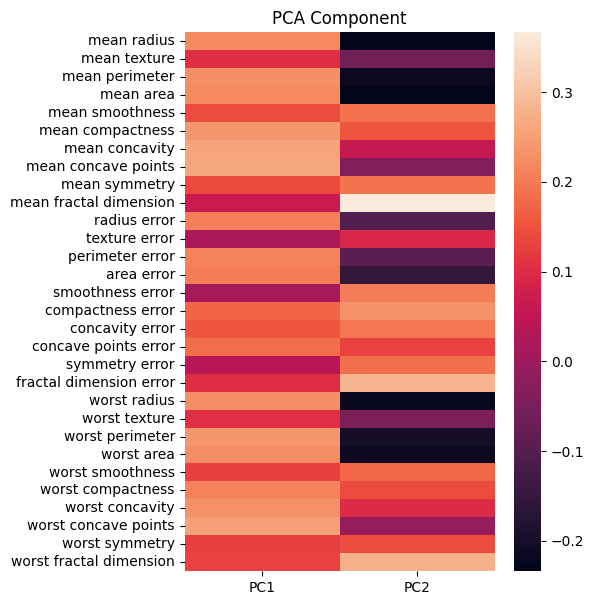

In [13]:
# PCA component or unit matrix 
u = eigenvectors[:,:n_components] 
pca_component = pd.DataFrame(u, index = cancer['feature_names'], columns = ['PC1','PC2'] ) 
# plotting heatmap 
plt.figure(figsize =(5, 7)) 
sns.heatmap(pca_component) 
plt.title('PCA Component') 
plt.show()

In [14]:
# Matrix multiplication or dot Product 
Z_pca = X_normalized @ pca_component # Rename the columns name 
Z_pca.rename({'PC1': 'PCA1', 'PC2': 'PCA2'}, axis=1, inplace=True) # Print the Pricipal Component values 
print(Z_pca)

          PCA1       PCA2
0     9.184755   1.946870
1     2.385703  -3.764859
2     5.728855  -1.074229
3     7.116691  10.266556
4     3.931842  -1.946359
..         ...        ...
564   6.433655  -3.573673
565   3.790048  -3.580897
566   1.255075  -1.900624
567  10.365673   1.670540
568  -5.470430  -0.670047

[569 rows x 2 columns]


**Із використанням sklearn**

           PC1        PC2
0     9.184755   1.946870
1     2.385703  -3.764859
2     5.728855  -1.074229
3     7.116691  10.266556
4     3.931842  -1.946359
..         ...        ...
564   6.433655  -3.573673
565   3.790048  -3.580897
566   1.255075  -1.900624
567  10.365673   1.670540
568  -5.470430  -0.670047

[569 rows x 2 columns]


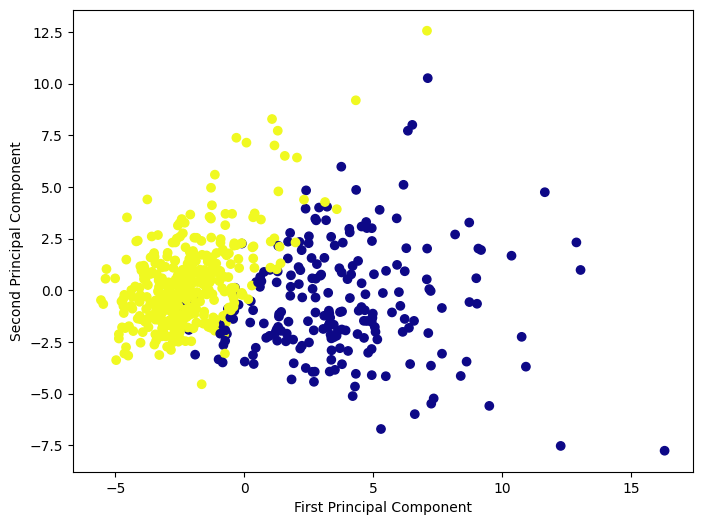

In [15]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X_normalized)
x_pca = pca.transform(X_normalized)

df_pca1 = pd.DataFrame(x_pca, columns=['PC{}'. format(i+1) for i in range(n_components)]) 
print(df_pca1)

# giving a larger plot 
plt.figure(figsize=(8, 6)) 
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=cancer['target'], cmap='plasma') 
# labeling x and y axes 
plt.xlabel('First Principal Component') 
plt.ylabel('Second Principal Component') 
plt.show()